In [6]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split



In [7]:
doc_level = pd.read_excel("/Users/dnsosa/Downloads/Coronawhy-Contra-Claims-Scaling-v2-annotated-2020-10-21.xlsx", "Docs")
span_level = pd.read_excel("/Users/dnsosa/Downloads/Coronawhy-Contra-Claims-Scaling-v2-annotated-2020-10-21.xlsx", "Spans")



In [8]:
doc_level

,docnum,tags,source,text,row_id,paper1_cord_uid,paper2_cord_uid
0,0,NEUTRAL,Demo-Annotations_43573ac3-R1,Claim1:\n\nchloroquine has been recommended by...,323,rc5bn6jc,sdij1d90
1,1,NEUTRAL,Demo-Annotations_43573ac3-R1,Claim1:\n\n15 our regression model identified ...,413,36amafub,rirbffi6
2,2,NEUTRAL,Demo-Annotations_43573ac3-R1,Claim1:\n\nn/a fax: +90 322 458 88 54 inhibiti...,431,1emlkii0,27f9241x
3,3,ENTAILMENT,Demo-Annotations_43573ac3-R1,"Claim1:\n\nin addition, a case report showed t...",97,iua7twk5,1mjaycee
4,4,ENTAILMENT,Demo-Annotations_43573ac3-R1,"Claim1:\n\nfurthermore, despite the favorable ...",14,v17l6t5u,kmzum2a9
...,...,...,...,...,...,...,...
997,997,ENTAILMENT,Demo-Annotations_43573ac3-R1,Claim1:\n\ntaking into account the above-menti...,504,qslc2wry,rpmmadqc
998,998,CONTRADICTION,Demo-Annotations_43573ac3-R1,Claim1:\n\nseveral potential key benefits were...,310,zhfrgaxf,ww1g6aju
999,999,NEUTRAL,Demo-Annotations_43573ac3-R1,"Claim1:\n\nif this hypothesis is correct, hydr...",555,c8vu4ngl,yqt131g3
1000,1000,ENTAILMENT,Demo-Annotations_43573ac3-R1,Claim1:\n\nspecific therapeutic procedures sug...,258,nxkxoved,hcuxj2k7


In [9]:
n_neu = len(doc_level[doc_level.tags == "NEUTRAL"])
n_ent = len(doc_level[doc_level.tags == "ENTAILMENT"])
n_con = len(doc_level[doc_level.tags == "CONTRADICTION"])

print(f"Found {n_neu} neutrals ({round(n_neu / 1002 * 100, 1)}%)")
print(f"Found {n_ent} entailments ({round(n_ent / 1002 * 100, 1)}%)")
print(f"Found {n_con} contradictions ({round(n_con / 1002 * 100, 1)}%)")

Found 608 neutrals (60.7%)
Found 225 entailments (22.5%)
Found 105 contradictions (10.5%)


In [12]:
drug_list = ["hydroxychloroquine", " chloroquine", "tocilizumab", "remdesivir", "vitamin d", "lopinavir", "dexamethasone"]

counts = []
percents = []
sentence_sets = []

for drug in drug_list:
    
    doc_level = doc_level.dropna()
    doc_level_drug = doc_level[doc_level.text.str.contains(drug)]

    N = len(doc_level_drug)

    #n_neu = len(doc_level_drug[(doc_level_drug.tags.contains([]) == "NEUTRAL") or (doc_level_drug.tags == "DUPLICATE") or (doc_level_drug.tags.contains("QUESTION"))])
    n_neu = len(doc_level_drug[doc_level_drug.tags.str.contains("NEUTRAL|QUESTION|DUPLICATE")])
    n_ent = len(doc_level_drug[doc_level_drug.tags.str.contains("ENTAILMENT|STRICT_ENTAILMENT")])
    n_con = len(doc_level_drug[doc_level_drug.tags.str.contains("CONTRADICTION|STRICT_CONTRADICTION")])
    
    per_neu = round(n_neu / N * 100, 1)
    per_ent = round(n_ent / N * 100, 1)
    per_con = round(n_con / N * 100, 1)

    print(f"For drug {drug} found {N} claim pairs:")
    print(f"Found {n_neu} neutrals ({per_neu}%)")
    print(f"Found {n_ent} entailments ({per_ent}%)")
    print(f"Found {n_con} contradictions ({per_con}%)")
    print("\n\n")
    
    counts.append([n_neu, n_ent, n_con])
    percents.append([per_neu, per_ent, per_con])
    
    sentence_sets.append(set(list(doc_level_drug.text)))
    
count_df = pd.DataFrame(counts, columns = ['N_Neu', 'N_Ent', 'N_Con'], index = drug_list)
percent_df = pd.DataFrame(percents, columns = ['Per_Neu', 'Per_Ent', 'Per_Con'], index = drug_list)

    

# TO DO: 
# 1. X Plot this
# 2. X Do these agree with polarity?
# 3. What about for ManConCorpus?
# 4. Can polarity + similarity do better?
# 5. Double check that the categories are what I expected?
# 6. Citation network, at least for the French paper. Look if they agree/disagree.
# 7. Find instances of negative citation polarity and see if we can extract contradictions?
# 8. Pickle the daikons, try the bourbon peach cordial, start new tinctures
    
    

For drug hydroxychloroquine found 408 claim pairs:
Found 274 neutrals (67.2%)
Found 65 entailments (15.9%)
Found 69 contradictions (16.9%)



For drug  chloroquine found 289 claim pairs:
Found 186 neutrals (64.4%)
Found 66 entailments (22.8%)
Found 37 contradictions (12.8%)



For drug tocilizumab found 184 claim pairs:
Found 112 neutrals (60.9%)
Found 55 entailments (29.9%)
Found 17 contradictions (9.2%)



For drug remdesivir found 250 claim pairs:
Found 166 neutrals (66.4%)
Found 61 entailments (24.4%)
Found 23 contradictions (9.2%)



For drug vitamin d found 137 claim pairs:
Found 95 neutrals (69.3%)
Found 37 entailments (27.0%)
Found 5 contradictions (3.6%)



For drug lopinavir found 238 claim pairs:
Found 169 neutrals (71.0%)
Found 53 entailments (22.3%)
Found 16 contradictions (6.7%)



For drug dexamethasone found 163 claim pairs:
Found 92 neutrals (56.4%)
Found 50 entailments (30.7%)
Found 21 contradictions (12.9%)





In [18]:
import numpy as np

N_drugs = len(sentence_sets)
intersection_cts = np.zeros((N_drugs, N_drugs))
for i in range(len(sentence_sets)):
    for j in range(len(sentence_sets)):
        intersection_cts[i,j] = len(sentence_sets[i].intersection(sentence_sets[j]))
        

In [19]:
intersection_cts

array([[398., 204.,  12., 100.,   0., 112.,  15.],
       [204., 279.,  16.,  92.,   0.,  64.,   6.],
       [ 12.,  16., 183.,  46.,   9.,  14.,  22.],
       [100.,  92.,  46., 234.,   0., 113.,  41.],
       [  0.,   0.,   9.,   0., 132.,   0.,   0.],
       [112.,  64.,  14., 113.,   0., 228.,   4.],
       [ 15.,   6.,  22.,  41.,   0.,   4., 160.]])

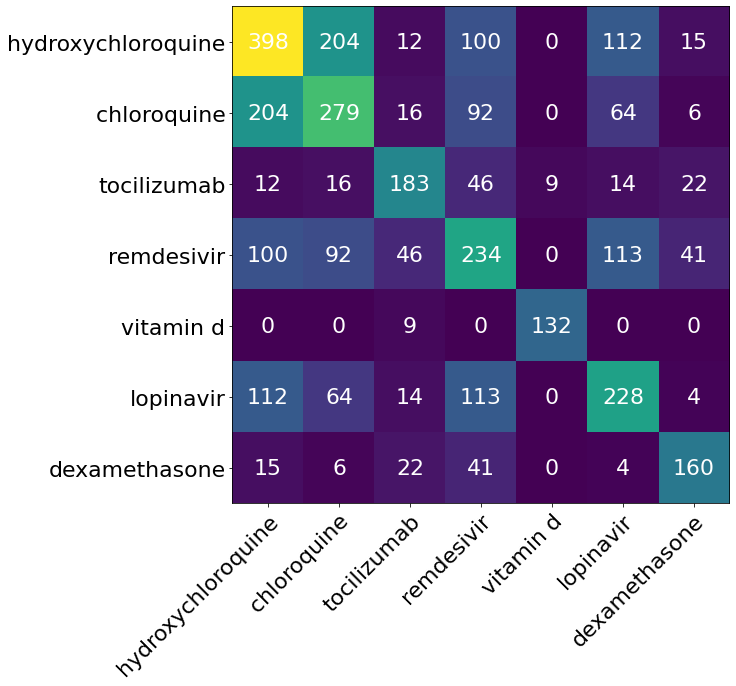

In [24]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams

# sphinx_gallery_thumbnail_number = 2

rcParams['figure.figsize'] = 20, 10
plt.rcParams.update({'font.size': 22})

fig, ax = plt.subplots()
im = ax.imshow(intersection_cts)

# We want to show all ticks...
ax.set_xticks(np.arange(len(drug_list)))
ax.set_yticks(np.arange(len(drug_list)))
# ... and label them with the respective list entries
ax.set_xticklabels(drug_list)
ax.set_yticklabels(drug_list)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(drug_list)):
    for j in range(len(drug_list)):
        text = ax.text(j, i, int(intersection_cts[i, j]),
                       ha="center", va="center", color="w")

#ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

In [26]:
sentence_sets[0].intersection(sentence_sets[1])

{"Claim1:\n\naccording to the findings of this study, hydroxychloroquine appears to be not effective and safe in the treatment of patients with covid-19.\n\nClaim2:\n\non the basis of hydroxychloroquine's superior antiviral and prophylactic activity, as well as its more tolerable safety profile in comparison to chloroquine, we believe that hydroxychloroquine may be a promising drug for the treatment of sars-cov-2 infection [24] .",
 'Claim1:\n\nafter delivery, there was a clinical deterioration; she was treated with lopinavir-ritonavir, oseltamivir, hydroxychloroquine, meropenem, and vancomycin and received corticosteroid pulse therapy, emergency plasmapheresis, and invasive ventilation.\n\nClaim2:\n\nbesides preventive strategies against sars-cov-2 infection practiced in many countries, such as quarantine of confirmed infected individuals, contact tracing by smartphone, protection of individuals at high risk of infection, nationwide limited curfew, and the urgent development and rapid

In [27]:
ex = 'Claim1:\n\nan in vitro study found that remdesivir and chloroquine inhibit viral infection, but further study is required [84,85].\n\nClaim2:\n\nnow a couple of clinical trials focus on the efficacy of remdesivir, as well as other therapeutic strategies, such as immunoglobulins, vitamin c infusion, mesenchymal stem cell treatment, arbidol hydrochloride plus interferon atomization, ritonavir combined with oseltamivir, lopinavir plus ritonavir and arbidol hydroxychloroquine and methylprednisolone [30] .'

doc_level[doc_level.text == ex]

,docnum,tags,source,text,row_id,paper1_cord_uid,paper2_cord_uid
902,902,NEUTRAL,Demo-Annotations_43573ac3-R1,Claim1:\n\nan in vitro study found that remdes...,137,yy7abob9,iua7twk5


In [83]:
set(doc_level_drug.tags)

{'CONTRADICTION',
 'DUPLICATE',
 'ENTAILMENT',
 'NEUTRAL',
 'STRICT_CONTRADICTION',
 'STRICT_ENTAILMENT',
 nan}

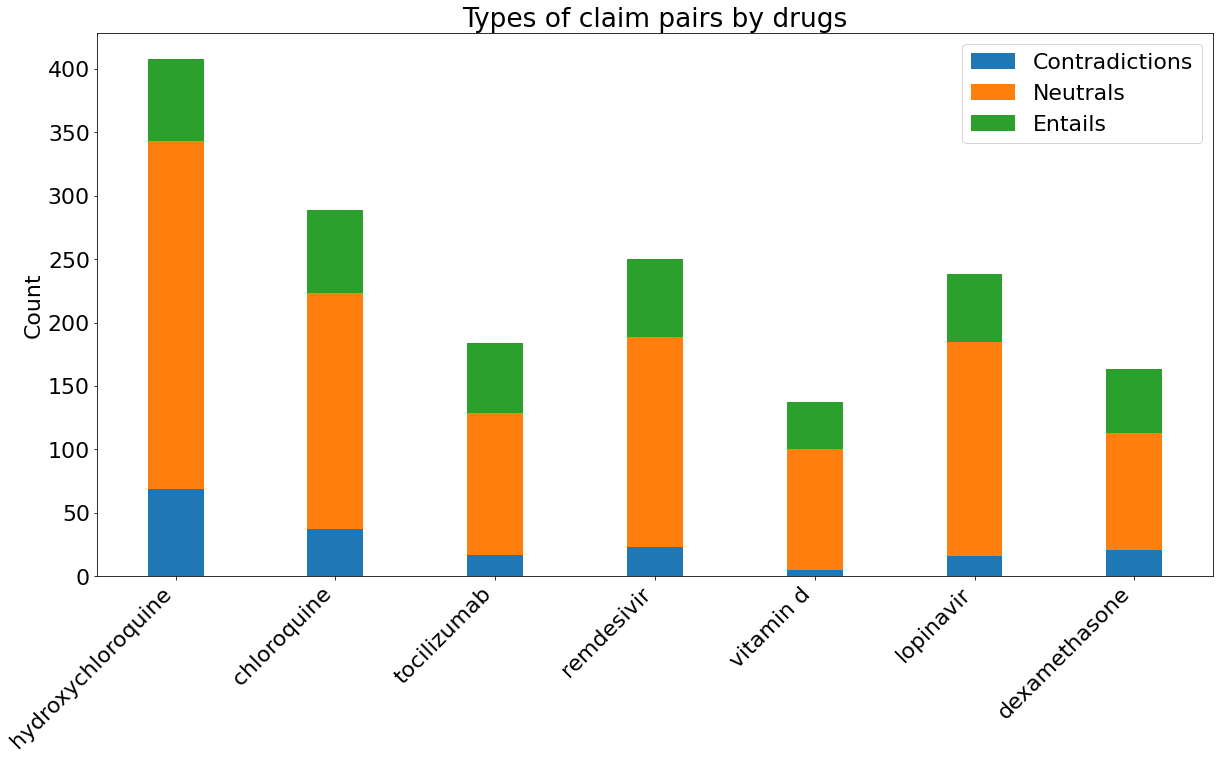

In [90]:
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 20, 10
plt.rcParams.update({'font.size': 22})

labels = drug_list
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, count_df.N_Con, width, label='Contradictions')
ax.bar(labels, count_df.N_Neu, width, label='Neutrals', bottom=count_df.N_Con)
ax.bar(labels, count_df.N_Ent, width, label='Entails', bottom=count_df.N_Con+count_df.N_Neu)

plt.setp(ax.get_xticklabels(), ha="right", rotation=45)
ax.set_ylabel('Count')
ax.set_title('Types  of claim pairs by drugs')
ax.legend()

#plt.setp(labels, rotation=90)
#plt.show()


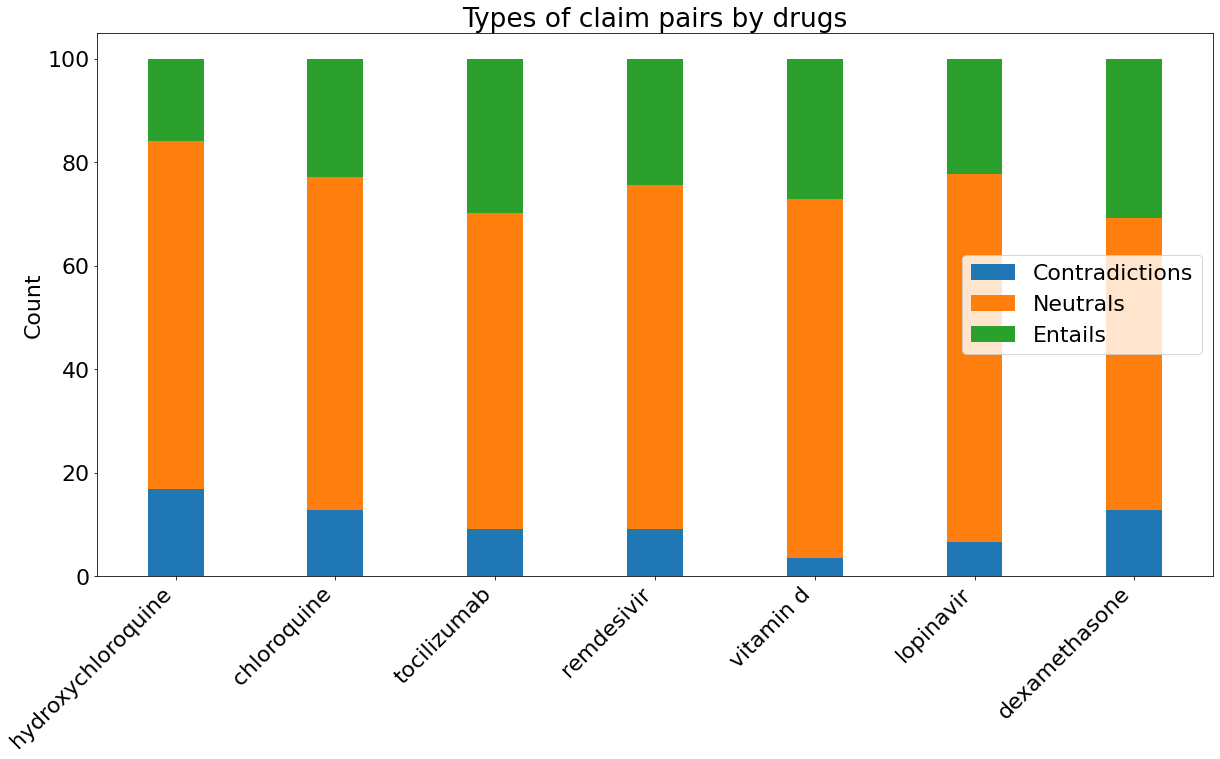

In [91]:
rcParams['figure.figsize'] = 20, 10
plt.rcParams.update({'font.size': 22})

labels = drug_list
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, percent_df.Per_Con, width, label='Contradictions')
ax.bar(labels, percent_df.Per_Neu, width, label='Neutrals', bottom=percent_df.Per_Con)
ax.bar(labels, percent_df.Per_Ent, width, label='Entails', bottom=percent_df.Per_Con+percent_df.Per_Neu)

plt.setp(ax.get_xticklabels(), ha="right", rotation=45)
ax.set_ylabel('Count')
ax.set_title('Types of claim pairs by drugs')
ax.legend(loc = "right")




In [21]:
# FORMALLY SPLIT TO DEV AND TEST HERE!

eval_data_dir = "/Users/dnsosa/Desktop/AltmanLab/ContradictoryClaims/drug-lit-contradictory-claims/input"
eval_data_path_ROAM_DEV = os.path.join(eval_data_dir, "roam_annotations_DEV_set.csv")
eval_data_path_ROAM_TEST = os.path.join(eval_data_dir, "roam_annotations_TEST_set.csv")

dev_df, test_df = train_test_split(doc_level, test_size=0.5)
dev_df.to_csv(eval_data_path_ROAM_DEV)
test_df.to_csv(eval_data_path_ROAM_TEST)

#doc_level.sample(n=500).to_csv("")


In [22]:
len(dev_df)

501

In [23]:
len(test_df)

501

In [2]:
# Doing a bit of analysis on the ManConCorpus
import os
import contradictory_claims as cc

ROOT_DIR = "~/Desktop/AltmanLab/ContradictoryClaims/drug-lit-contradictory-claims/"
mancon_path = os.path.join(ROOT_DIR, 'input/manconcorpus-sent-pairs/manconcorpus_sent_pairs_200516.tsv')
mancon = cc.data.make_dataset.load_mancon_corpus_from_sent_pairs(mancon_path)

Number of contradiction pairs: 728
Number of entailment pairs: 1966
Number of neutral pairs: 15217


In [33]:
len(mancon)

4

In [28]:
mancon_data

NameError: name 'mancon_data' is not defined

In [29]:
mancon_data = pd.read_csv(mancon_path, sep='\t')

In [30]:
mancon_data

,label,guid,text_a,text_b
0,contradiction,0,Combined clopidogrel and aspirin overcome sing...,The observed trend toward higher patency rates...
1,contradiction,1,Combined clopidogrel and aspirin overcome sing...,"compared with aspirin monotherapy, the combina..."
2,contradiction,2,This pilot study confirms a high rate of graft...,The observed trend toward higher patency rates...
3,contradiction,3,This pilot study confirms a high rate of graft...,"compared with aspirin monotherapy, the combina..."
4,contradiction,4,Aspirin plus clopidogrel is more effective in ...,The observed trend toward higher patency rates...
...,...,...,...,...
17906,neutral,17906,"In conclusion, these data support the use of L...",Carrying the DD genotype may have some influen...
17907,neutral,17907,"In conclusion, these data support the use of L...",We found an association between the genotype I...
17908,neutral,17908,"In conclusion, these data support the use of L...",It is highly likely that the observed small no...
17909,neutral,17909,"In conclusion, these data support the use of L...","In conclusion, a molecular variant of ACE, but..."


In [98]:
from fse.models.average import FAST_VERSION, MAX_WORDS_IN_BATCH
from fse.models import uSIF

import gensim.downloader as api
from fse import SplitIndexedList

import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

import logging
logging.basicConfig(format='%(asctime)s : %(threadName)s : %(levelname)s : %(message)s', level=logging.INFO)

glove = api.load("glove-wiki-gigaword-300")

sentences = list(mancon_data.text_a.values)
print(len(mancon_data.text_a.values))
sentences.extend(list(mancon_data.text_b.values))
#s = IndexedList(sentences*8)
s = SplitIndexedList(sentences)
print(len(s))
# NOTE, MANY repeats

print(MAX_WORDS_IN_BATCH)
print(FAST_VERSION) #uh oh...

model = uSIF(glove, workers=2, lang_freq="en")
model.train(s)

sent_sims = []
for i in range(len(mancon_data.text_a.values)):
    sim = model.sv.similarity(i, i+len(mancon_data.text_a.values))
    sent_sims.append(sim)
    
mancon_data["uSIF_sims"] = sent_sims
mancon_data["uSIF_sims"] = mancon_data["uSIF_sims"].abs()

2020-10-28 18:02:13,763 : MainThread : INFO : loading projection weights from /Users/dnsosa/gensim-data/glove-wiki-gigaword-300/glove-wiki-gigaword-300.gz
2020-10-28 18:04:43,392 : MainThread : INFO : loaded (400000, 300) matrix from /Users/dnsosa/gensim-data/glove-wiki-gigaword-300/glove-wiki-gigaword-300.gz
2020-10-28 18:04:43,399 : MainThread : INFO : no frequency mode: using wordfreq for estimation of frequency for language: en


17911
35822
10000
-1


2020-10-28 18:04:43,854 : MainThread : INFO : scanning all indexed sentences and their word counts
2020-10-28 18:04:43,968 : MainThread : INFO : finished scanning 35822 sentences with an average length of 24 and 884941 total words
2020-10-28 18:04:44,072 : MainThread : INFO : estimated memory for 35822 sentences with 300 dimensions and 400000 vocabulary: 500 MB (0 GB)
2020-10-28 18:04:44,074 : MainThread : INFO : initializing sentence vectors for 35822 sentences
2020-10-28 18:04:44,246 : MainThread : INFO : pre-computing uSIF weights for 400000 words
2020-10-28 18:04:45,572 : MainThread : INFO : begin training
2020-10-28 18:04:47,955 : MainThread : INFO : worker thread finished; awaiting finish of 1 more threads
2020-10-28 18:04:47,960 : MainThread : INFO : worker thread finished; awaiting finish of 0 more threads
2020-10-28 18:04:48,241 : MainThread : INFO : computing 5 principal components took 0s
2020-10-28 18:04:48,272 : MainThread : INFO : removing 5 principal components took 0s
2

In [37]:
list(mancon[2])

['[CLS]Home or Hospital in Heart failure indicates that self-managed HT of clinical and physiological parameters is feasible in HF patients, with surprisingly high compliance.[SEP]Long-term atorvastatin therapy decreases neurohumoral activation and improves cardiac function in patients with mild to moderate CHF.',
 '[CLS]Aspirin plus clopidogrel is more effective in venous graft patency than aspirin alone in the short term after CABG, but further, long-term study is needed.[SEP]In the ABCD study, enalapril treatment was associated with a lower risk of myocardial infarction.',
 '[CLS]Our findings suggest that the -463 G/A polymorphism of the MPO gene influences the risk of CAD.[SEP]Enalapril appears not to induce regression, but perhaps prevents progression with an effect that is intermediate between those of nitrendipine and placebo.',
 '[CLS]The preliminary results of this ongoing study support the feasibility and appropriateness of new technologies for the management of heart failure

In [40]:
import numpy as np
import tensorflow as tf
import transformers
import wandb
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from transformers import AutoModel, AutoModelWithLMHead, AutoTokenizer, TFAutoModel
from wandb.keras import WandbCallback

# Fit model to data
MODEL = "allenai/biomed_roberta_base"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
MAX_LEN = 512
method = 2 # what does this mean?

# Load trained model (ASSUMES TRAINED ALREADY!)
transformer_dir = "/Users/dnsosa/Desktop/AltmanLab/ContradictoryClaims/drug-lit-contradictory-claims/output/transformer/biomed_roberta/24-7-2020_16-23"
pickle_file = os.path.join(transformer_dir, 'sigmoid.pickle')
model = cc.models.train_model.load_model(pickle_file, transformer_dir)

#ls = []
#for i in range(len(eval_data)):
#    ls.append(str('[CLS]'+eval_data.loc[i,'text1']+'[SEP]'+eval_data.loc[i,'text2']))
    
test_example = cc.models.train_model.regular_encode(list(mancon[2]), tokenizer, maxlen=MAX_LEN)
predictions = model.predict(test_example)

# cc.models.make_prediction(model, data_to_evaluate, method)

All model checkpoint weights were used when initializing TFRobertaModel.

All the weights of TFRobertaModel were initialized from the model checkpoint at /Users/dnsosa/Desktop/AltmanLab/ContradictoryClaims/drug-lit-contradictory-claims/output/transformer/biomed_roberta/24-7-2020_16-23.
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFRobertaModel for predictions without further training.


NameError: name 'eval_data' is not defined

In [48]:
#predictions_df = pd.DataFrame(predictions).idxmax(axis=1)
predictions_df = pd.DataFrame(predictions)
predictions_df.columns = ["BioBERT_neutrals", "BioBERT_entailment", "BioBERT_contradictions"]

In [44]:
#eval_data['BioBERT_Prediction_con'] = [p[2] for p in predictions]
#eval_data['BioBERT_Prediction_ent'] = [p[1] for p in predictions]
#eval_data['BioBERT_Prediction_neu'] = [p[0] for p in predictions]

3583

In [49]:
predictions_df

,BioBERT_neutrals,BioBERT_entailment,BioBERT_contradictions
0,0.999970,0.000028,0.000002
1,0.999983,0.000003,0.000014
2,0.999987,0.000012,0.000001
3,0.999994,0.000002,0.000004
4,0.999738,0.000257,0.000005
...,...,...,...
3578,0.001353,0.998586,0.000061
3579,0.999942,0.000054,0.000004
3580,0.999994,0.000004,0.000002
3581,0.022591,0.977391,0.000018


In [50]:
mancon[3]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [54]:
fpr

{}

<ipython-input-99-35fa4d8c3a1f>:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


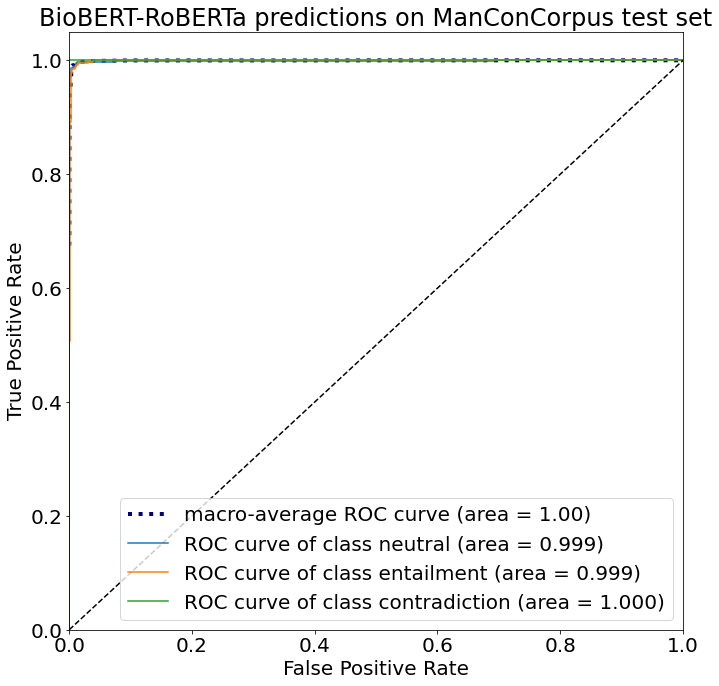

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

rcParams['figure.figsize'] = 11, 11
plt.rcParams.update({'font.size': 20})

# Binarize the annotations
n_classes = 3
#binarized_annotations = label_binarize(eval_data.annotation, classes=["contradiction", "entailment", "neutral"])
binarized_annotations = label_binarize(mancon[3], classes=["neutral", "entailment", "contradiction"])
predicted_annotations = predictions

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(binarized_annotations[:, 2-i], predicted_annotations[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(binarized_annotations.ravel(), predicted_annotations.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
plt.figure()
#plt.plot(fpr["micro"], tpr["micro"],
#         label='micro-average ROC curve (area = {0:0.2f})'
#               ''.format(roc_auc["micro"]),
#         color='deeppink', linestyle=':', linewidth=4)
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

classes=["neutral", "entailment", "contradiction"]
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.3f})'
                                   ''.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BioBERT-RoBERTa predictions on ManConCorpus test set')
plt.legend(loc="lower right")
plt.show()

In [76]:
mancon[3][0:10]
mancon[3][8]

array([0., 1., 0.], dtype=float32)

In [66]:
mancon[2]

array(['[CLS]Home or Hospital in Heart failure indicates that self-managed HT of clinical and physiological parameters is feasible in HF patients, with surprisingly high compliance.[SEP]Long-term atorvastatin therapy decreases neurohumoral activation and improves cardiac function in patients with mild to moderate CHF.',
       '[CLS]Aspirin plus clopidogrel is more effective in venous graft patency than aspirin alone in the short term after CABG, but further, long-term study is needed.[SEP]In the ABCD study, enalapril treatment was associated with a lower risk of myocardial infarction.',
       '[CLS]Our findings suggest that the -463 G/A polymorphism of the MPO gene influences the risk of CAD.[SEP]Enalapril appears not to induce regression, but perhaps prevents progression with an effect that is intermediate between those of nitrendipine and placebo.',
       ...,
       '[CLS]A formal education and support intervention substantially reduced adverse clinical outcomes and costs for pat

In [77]:
predictions[8]

array([2.825455e-02, 9.716825e-01, 6.285799e-05], dtype=float32)

In [86]:
predictions_df[predictions_df.idxmax(axis=1) == "BioBERT_entailment"]

,BioBERT_neutrals,BioBERT_entailment,BioBERT_contradictions
8,0.028255,0.971682,0.000063
14,0.002410,0.997577,0.000013
33,0.131977,0.865670,0.002353
37,0.005942,0.994041,0.000017
38,0.028132,0.971276,0.000593
...,...,...,...
3491,0.001346,0.998630,0.000024
3553,0.002724,0.997240,0.000036
3569,0.083561,0.916398,0.000041
3578,0.001353,0.998586,0.000061


In [88]:
mancon_df = pd.DataFrame(mancon[3])
mancon_df.columns = ["Neutral", "Entailment", "Contradiction"]

In [92]:
mancon_df[mancon_df.Entailment == 1]

,Neutral,Entailment,Contradiction
8,0.0,1.0,0.0
14,0.0,1.0,0.0
37,0.0,1.0,0.0
38,0.0,1.0,0.0
70,0.0,1.0,0.0
...,...,...,...
3491,0.0,1.0,0.0
3553,0.0,1.0,0.0
3569,0.0,1.0,0.0
3578,0.0,1.0,0.0


In [95]:
binarized_annotations

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]])